PART 1

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.metrics import accuracy_score,mean_squared_error
import matplotlib.pyplot as plt



In [37]:
labeled_data = pd.read_csv('Task2C_labeled.csv')
unlabeled_data = pd.read_csv('Task2C_unlabeled.csv')
test_data = pd.read_csv('Task2C_test.csv')
unlabeled_data1 = pd.concat([labeled_data.drop('label', axis=1),unlabeled_data])

In [38]:
X_labeled = np.array(labeled_data.drop('label', axis=1))
y_labeled = np.array(labeled_data['label'])
X_unlabeled = np.array(unlabeled_data1)
X_test = np.array(test_data.drop('label', axis=1))
y_test = np.array(test_data['label'])

scaler = StandardScaler() #Initalizing the scaler
X_labeled = scaler.fit_transform(X_labeled) #Standardizing the data
X_unlabeled = scaler.fit_transform(X_unlabeled) #Standardizing the data
X_test = scaler.fit_transform(X_test)#Standardizing the data

PART 2

In [57]:
neurons = range(20, 221, 40)
reconstruction_errors = []  #intializing the reconstruction_errors list
autoencoders = [] #intializing the autoencoders list
for neurons1 in neurons:
    autoencoder = MLPRegressor(hidden_layer_sizes=(neurons1,),max_iter=10000) #Building the Autoencoder using MLPRegressor
    autoencoder.fit(X_unlabeled, X_unlabeled) #Fitting the autocoder
    autoencoders.append(autoencoder) #Storing the model
    X_encoded = autoencoder.predict(X_unlabeled) #Encoding the data using the trained autoencoder
    mse = ((X_unlabeled - X_encoded) ** 2).mean()#Calculating the mean squared error
    reconstruction_errors.append(mse) #Storing the mse errors
    print(f"Reconstruction error with {neurons1} neurons: {mse:.4f}")

Reconstruction error with 20 neurons: 0.4626
Reconstruction error with 60 neurons: 0.2548
Reconstruction error with 100 neurons: 0.1572
Reconstruction error with 140 neurons: 0.1022
Reconstruction error with 180 neurons: 0.0690
Reconstruction error with 220 neurons: 0.0503


PART 3

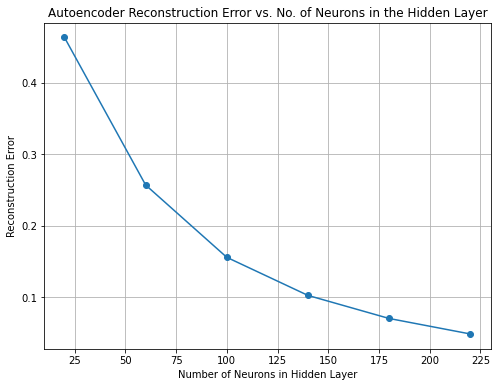

In [56]:
plt.figure(figsize=(8, 6)) #Intializing the plot size
plt.plot(neuron_counts, reconstruction_errors, marker='o', linestyle='-')  #Creating the plot
plt.title('Autoencoder Reconstruction Error vs. No. of Neurons in the Hidden Layer') #Adding title and other labels
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Reconstruction Error')
plt.grid(True)
plt.show()

PART 4

In [67]:
test_errors = [] 
for neurons1 in neurons:
    classifier = MLPClassifier(hidden_layer_sizes=(neurons1,), max_iter=10000, random_state=155) #Intializing the neural network using MLPClassifier
    classifier.fit(X_labeled, y_labeled) #Fitting the neural network using MLPClassifier
    y_pred = classifier.predict(X_test) # Predicting on the testing data
    test_error = 1 - accuracy_score(y_test, y_pred) #Calculating the test error
    test_errors.append(test_error)#storing the test errors
    print(f"Test error of 3-Layer Neural Network with {neurons1} neurons: {test_error:.4f}")

Test error of 3-Layer Neural Network with 20 neurons: 0.3900
Test error of 3-Layer Neural Network with 60 neurons: 0.4120
Test error of 3-Layer Neural Network with 100 neurons: 0.4020
Test error of 3-Layer Neural Network with 140 neurons: 0.4120
Test error of 3-Layer Neural Network with 180 neurons: 0.4140
Test error of 3-Layer Neural Network with 220 neurons: 0.4000


PART 5

In [68]:
test_errors_augmented = []
for i, num_neurons in enumerate(neurons):
    autoencoder = autoencoders[i] #Using the previously saved autoencoder models
    X_encoded = autoencoder.predict(X_labeled)
    X_labeled_augmented = np.hstack((X_labeled, X_encoded)) # Concatenating the original features with the encoded features
    classifier = MLPClassifier(hidden_layer_sizes=(num_neurons,), max_iter=10000, random_state=155) #Initalizing the the neural network using MLPClassifier
    classifier.fit(X_labeled_augmented, y_labeled) #Fitting the model
    X_test_encoded = autoencoder.predict(X_test)
    X_test_augmented = np.hstack((X_test, X_test_encoded)) #Concatenating the testing data with the encoded features
    y_pred = classifier.predict(X_test_augmented) # Predicting on the testing data
    test_error = 1 - accuracy_score(y_test, y_pred) #Calculating the test error
    test_errors_augmented.append(test_error) #Storing the test error
    print(f"Test error with {num_neurons} neurons for augmented self-taught networks: {test_error:.4f}")

Test error with 20 neurons for augmented self-taught networks: 0.3780
Test error with 60 neurons for augmented self-taught networks: 0.3800
Test error with 100 neurons for augmented self-taught networks: 0.3840
Test error with 140 neurons for augmented self-taught networks: 0.3780
Test error with 180 neurons for augmented self-taught networks: 0.3460
Test error with 220 neurons for augmented self-taught networks: 0.3840


PART 6

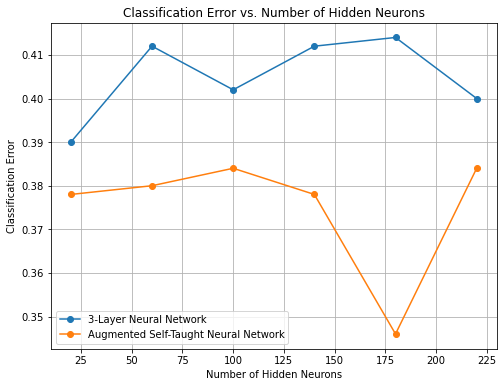

In [69]:
plt.figure(figsize=(8, 6)) #Intializing the plot size
plt.plot(neurons, test_errors, marker='o', linestyle='-', label='3-Layer Neural Network')  #Creating the plot
plt.plot(neurons, test_errors_augmented, marker='o', linestyle='-', label='Augmented Self-Taught Neural Network') #Creating the plot
plt.title('Classification Error vs. Number of Hidden Neurons') #Adding title and other labels
plt.xlabel('Number of Hidden Neurons')
plt.ylabel('Classification Error')
plt.legend()
plt.grid(True)
plt.show()

After trying various random states on the MLPClassifier we find that mostly the augmented self-taught neural networks tend to perform better than 3 layer neural network without the autoencoders. This might be due to the fact that the autoencoders are effective at extracting meaningful latent features and so the augmented self-taught networks benefit from the extra information in the form of augmented features. Also the autoencoders might be producing highly informative representations of the data. Its also possible that the dataset may have features that are highly responsive to encoding with autoencoders which might result in a substantial boost in performance for augmented self-taught networks.